## Mini Project III

In [1]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

#import seaborn
import seaborn as sns

#import pandas
import pandas as pd

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# cluster hierarchy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler


In [2]:
def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [3]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [4]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [5]:
def plot_clusters(X,y_res, xlabel, ylabel, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [255]:
df = pd.read_csv('twm_customer.csv', sep=';')
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [256]:
df = df.iloc[:,1:-8] 

Dummies

In [257]:
# df['gender'].str.strip()
# df['gender'] = df['gender'].replace({'M ' : 0, 'F ': 1})
# df


dummy_gender = pd.get_dummies(df['gender'])
df = pd.merge(
    left=df,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)
df.drop(columns=['gender'], inplace=True)

In [258]:
dummy_gender = pd.get_dummies(df['marital_status'])
df = pd.merge(
    left=df,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)
df.drop(columns=['marital_status'], inplace=True)


if skipping dummies don't forget to drop

In [259]:
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['marital_status'], inplace=True)

KeyError: "['gender'] not found in axis"

In [260]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(x, columns=df.columns)
x

,income,age,years_with_bank,nbr_children,F,M,1,2,3,4
0,0.154185,0.184312,0.408539,0.258591,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
1,-0.726524,1.493070,-1.087435,-0.648298,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
2,-0.188366,-0.234490,1.530520,-0.648298,0.887176,-0.887176,1.306339,-0.946541,-0.262049,-0.321555
3,1.123798,0.603115,-0.339448,-0.648298,0.887176,-0.887176,1.306339,-0.946541,-0.262049,-0.321555
4,0.983479,0.864867,1.904514,1.165479,0.887176,-0.887176,-0.765498,-0.946541,-0.262049,3.109892
...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,0.887176,-0.887176,-0.765498,-0.946541,-0.262049,3.109892
743,0.164864,0.707816,0.782533,0.258591,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
744,1.738064,0.393714,-1.461429,1.165479,-1.127172,1.127172,-0.765498,1.056479,-0.262049,-0.321555
745,-0.343735,-0.286841,1.156526,-0.648298,0.887176,-0.887176,-0.765498,1.056479,-0.262049,-0.321555


In [261]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(747, 2)

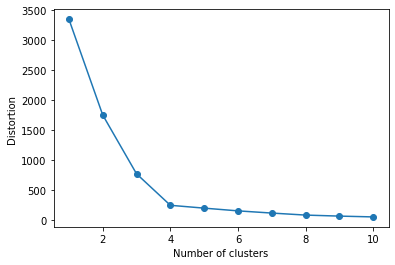

In [262]:
plot_distortion(pca)

In [263]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca[:,0:2])

No handles with labels found to put in legend.


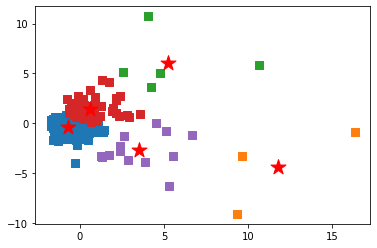

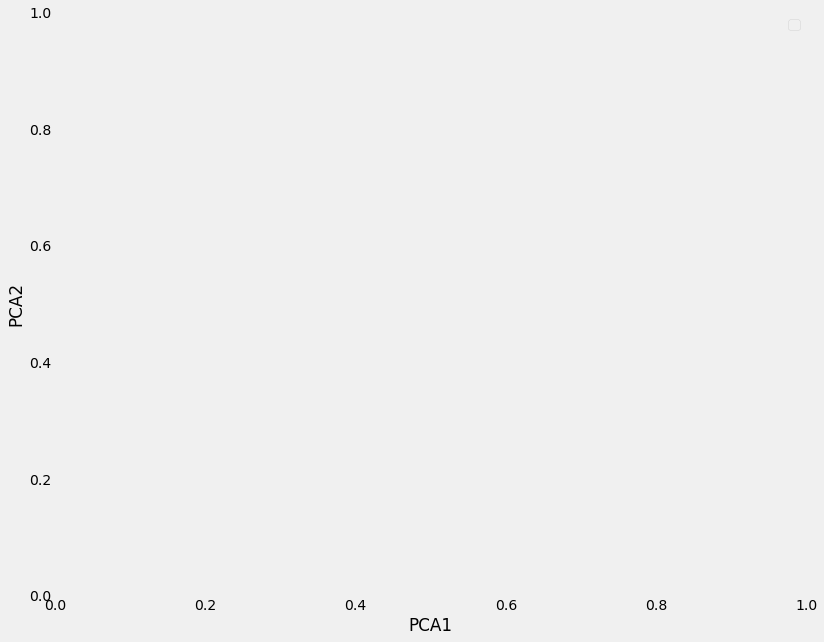

In [481]:
plot_clusters(pca[:,0:2], y_res, 'PCA1', 'PCA2', plt_cluster_centers = True)

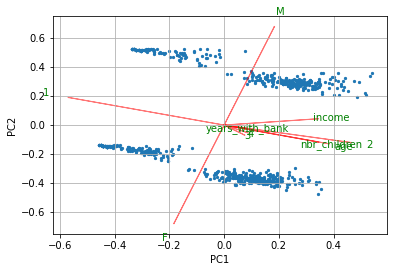

In [265]:
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))

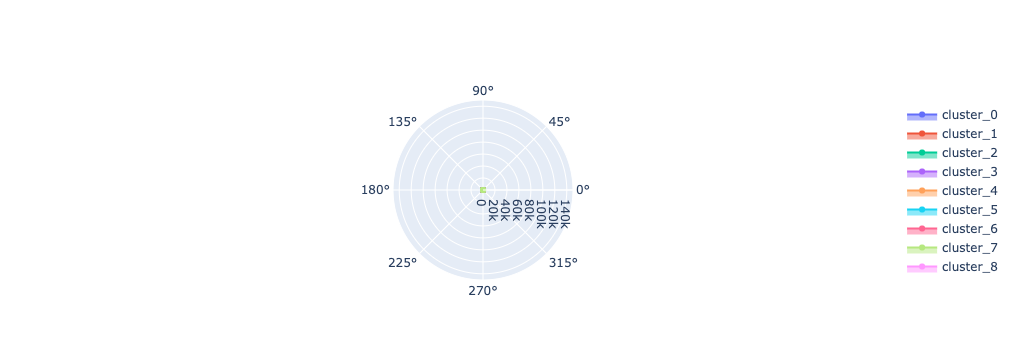

In [266]:
plot_radar_chart(df)

In [48]:
df['cluster'] = y_res
df[df['cluster'] == 0]

,income,age,years_with_bank,nbr_children,F,M,1,2,3,4,cluster
24,19334,42,2,2,1,0,0,0,0,1,0
26,3171,22,1,1,1,0,0,1,0,0,0
27,8976,28,7,1,1,0,0,1,0,0,0
30,24326,60,0,0,1,0,0,1,0,0,0
40,10025,35,5,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
733,9802,66,6,0,1,0,0,0,1,0,0
737,36605,40,0,1,1,0,0,0,0,1,0
740,2289,34,4,0,1,0,0,1,0,0,0
742,14795,36,6,1,1,0,0,0,0,1,0


### PCA Tests

In [392]:
df

,income,age,years_with_bank,nbr_children,F,M,1,2,3,4,cluster
0,26150,46,5,1,0,1,0,1,0,0,1
1,6605,71,1,0,0,1,0,1,0,0,1
2,18548,38,8,0,1,0,1,0,0,0,0
3,47668,54,3,0,1,0,1,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,1,0,0,0,0,1,1
743,26387,56,6,1,0,1,0,1,0,0,1
744,61300,50,0,2,0,1,0,1,0,0,1
745,15100,37,7,0,1,0,0,1,0,0,1


In [207]:
pcamodel.explained_variance_ 

array([2.46397231e+00, 1.43310147e+00, 1.12740709e+00, 1.08195620e+00,
       1.05209758e+00, 8.55848656e-01, 7.07851764e-01, 2.89829273e-01,
       4.58915762e-32])

In [208]:
pcamodel.explained_variance_ratio_

array([2.73408202e-01, 1.59020332e-01, 1.25099760e-01, 1.20056422e-01,
       1.16743239e-01, 9.49669935e-02, 7.85449079e-02, 3.21601424e-02,
       5.09223797e-33])

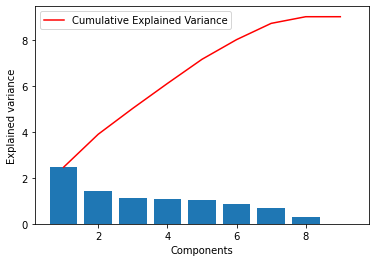

In [209]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

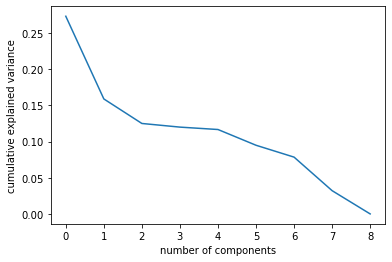

In [210]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

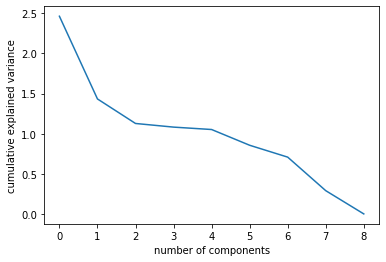

In [211]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

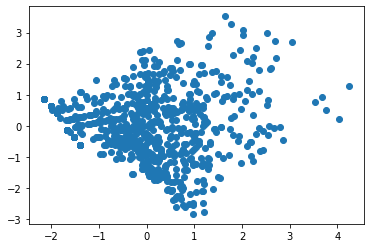

In [320]:
plt.scatter(pca[:, 0], pca[:, 1])


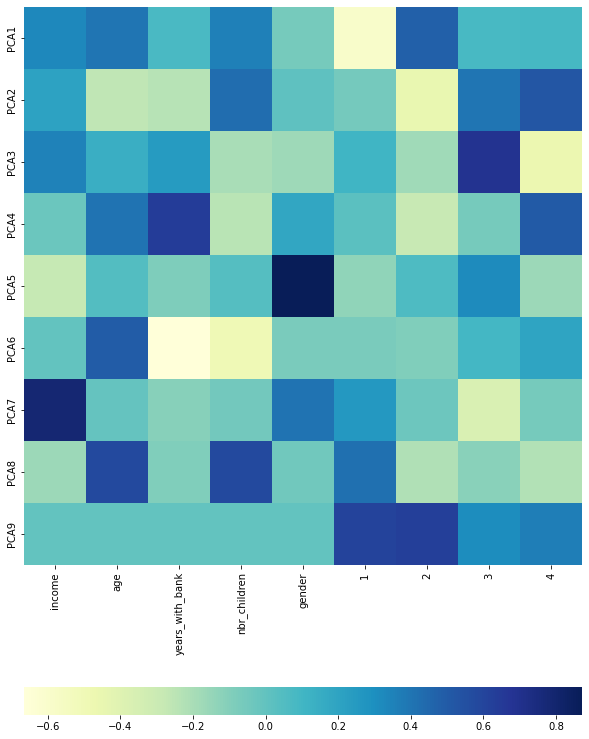

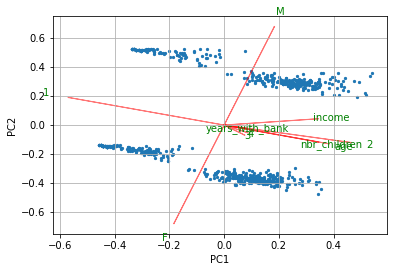

### Part 2

In [295]:
df3 = pd.read_csv('twm_savings_acct.csv', sep=';')
df3

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [296]:
df4 = pd.read_csv('twm_savings_tran.csv', sep=';')
df4

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [297]:
data2 = df4.groupby(by="cust_id", dropna=False).sum()
df5 = df3.join(data2, on='cust_id')
df5
#count and total of tran_amt per cust_id
#Add these as columns to twm_savings_acct.csv

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id,tran_amt,principal_amt,interest_amt,new_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,1176.0,9.50,6.25,3.25,10417.98
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,190.0,-638.84,-645.47,6.63,6750.71
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,78.0,3.78,0.00,3.78,3027.27
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,78.0,9.07,0.00,9.07,7261.90
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,300.0,890.33,857.83,32.50,63006.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,496.0,351.24,348.35,2.89,6279.22
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,561.0,174.91,163.59,11.32,29976.00
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,231.0,212.70,201.92,10.78,12498.25
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,406.0,-73.71,-76.33,2.62,5223.85


In [298]:
test = df4['cust_id'].value_counts().to_frame()
test = test.rename({'cust_id' : 'counts'}, axis=1)
test = test.reset_index()
test = test.rename({'index' : 'cust_id'}, axis=1)
df5 = df5.merge(test, how='outer', on='cust_id')
df5['counts'] = df5['counts'].fillna(0)

In [300]:
data2 = df5.drop(columns =['cust_id', 'minimum_balance', 'account_active', 'new_balance', 'acct_nbr', 'acct_start_date', 'acct_end_date', 'tran_id', 'principal_amt'])

In [301]:
data2.isnull().sum().sort_values(ascending=False)
data2.fillna(0, inplace=True)

In [302]:
# data2.replace({'acct_type' : {'BS  ' : 0, 'MM  ' : 1}, 'account_active': {"Y " : 1, "N ": 0}}, inplace= True)

 Dummies 

In [303]:
dummy = pd.get_dummies(data2['acct_type'])
data2 = pd.merge(
    left=data2,
    right=dummy,
    left_index=True,
    right_index=True,
)
data2.drop(columns=['acct_type'], inplace=True)

In [275]:
dummy = pd.get_dummies(data2['account_active'])
data2 = pd.merge(
    left=data2,
    right=dummy,
    left_index=True,
    right_index=True,
)
data2.drop(columns=['account_active'], inplace=True)

Or Drop

In [304]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
x = scaler.fit_transform(data2)
x = pd.DataFrame(x, columns=data2.columns)
x

,starting_balance,ending_balance,tran_amt,interest_amt,counts,BS,MM
0,-0.447081,-0.553308,-0.349955,-0.396526,1.927099,0.554485,-0.554485
1,-0.130614,-0.606738,-0.955378,-0.325244,-0.681611,-1.803476,1.803476
2,-0.366479,-0.489242,-0.355297,-0.385348,-1.311299,0.554485,-0.554485
3,-0.160851,-0.316109,-0.350357,-0.273786,-1.311299,0.554485,-0.554485
4,0.667935,0.800730,0.472568,0.220337,-0.231833,0.554485,-0.554485
...,...,...,...,...,...,...,...
416,-0.409312,-0.355461,-0.030837,-0.404118,0.397855,0.554485,-0.554485
417,-0.317549,-0.365357,-0.195495,-0.226335,0.577766,0.554485,-0.554485
418,-0.124545,-0.187561,-0.160206,-0.237723,-0.501700,0.554485,-0.554485
419,-0.413642,-0.566119,-0.427657,-0.409812,0.127989,0.554485,-0.554485


In [305]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(421, 2)

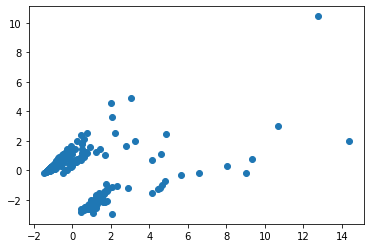

In [306]:
plt.scatter(pca[:, 0], pca[:, 1])

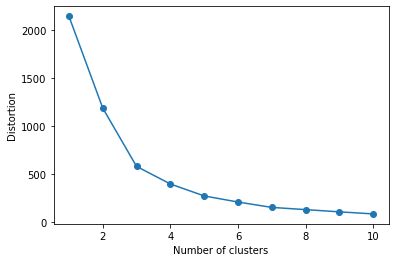

In [307]:
plot_distortion(pca)

In [308]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca[:,0:2])

In [309]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(pca[:,0:2])

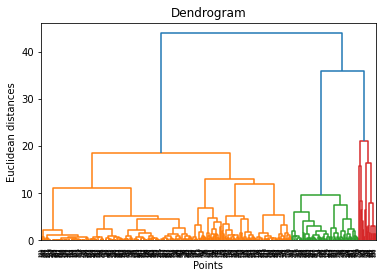

In [310]:
# aglomerative clustering
plot_dendrogram(x)

In [311]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 4)
y_hc = ac.fit_predict(pca[:,0:2])

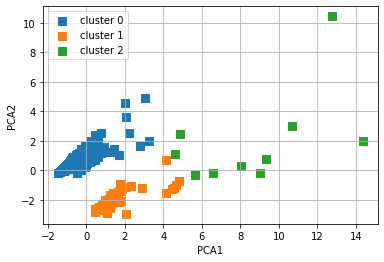

In [312]:
plot_clusters(pca[:,0:2], y_res, 'PCA1', 'PCA2', plt_cluster_centers = False)

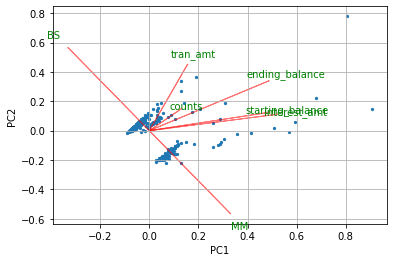

In [313]:
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))

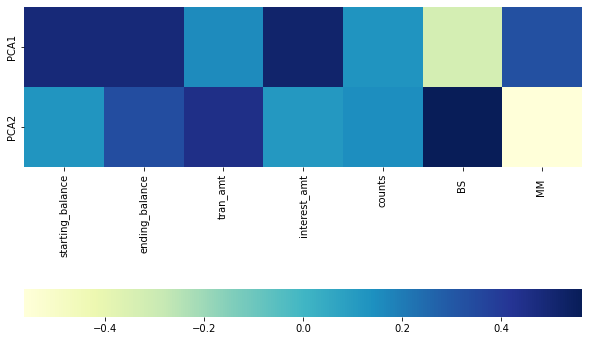

In [314]:
fig = plt.figure(figsize= (10,15))
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [290]:
data2['clusters'] = y_res


In [294]:
data2[data2['clusters'] == 0]

,starting_balance,ending_balance,tran_amt,interest_amt,counts,BS,MM,N,Y,clusters
0,113.04,122.54,9.50,3.25,48.0,1,0,0,1,0
2,250.24,254.02,3.78,3.78,12.0,1,0,0,1,0
3,600.26,609.33,9.07,9.07,12.0,1,0,0,1,0
7,127.81,596.38,469.38,5.03,26.0,1,0,0,1,0
8,252.24,9.71,-242.53,2.95,33.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
416,177.33,528.57,351.24,2.89,31.0,1,0,0,1,0
417,333.53,508.26,174.91,11.32,33.0,1,0,0,1,0
418,662.06,873.14,212.70,10.78,21.0,1,0,0,1,0
419,169.96,96.25,-73.71,2.62,28.0,1,0,0,1,0


### Part 3

In [58]:
df6 = pd.read_csv('twm_credit_tran.csv', sep=';')
df6

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [59]:
df7 = pd.read_csv('twm_credit_acct.csv', sep=';')
df7

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [60]:
data3 = df6.groupby(by="cust_id", dropna=False).sum()
df8 = df7.join(data3, on='cust_id')
df8

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id,tran_amt,principal_amt,interest_amt,new_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,2346.0,380.03,370.77,9.26,-22701.09
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,528.0,-1535.59,-1548.23,13.63,-25387.04
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,253.0,6977.25,6896.57,80.68,-7765.31
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,120.0,2406.65,2302.14,104.69,-28837.36
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,2016.0,-956.10,-1000.00,44.44,-38221.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,2850.0,18.55,-2.11,20.66,-58627.85
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,2775.0,-188.48,-306.11,118.98,-79088.64
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,2926.0,-1218.94,-1218.94,0.00,-35198.02
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,406.0,-9200.00,-9200.00,0.00,-143356.40


In [61]:
test = df6['cust_id'].value_counts().to_frame()
test = test.rename({'cust_id' : 'counts'}, axis=1)
test = test.reset_index()
test = test.rename({'index' : 'cust_id'}, axis=1)
df8 = df8.merge(test, how='outer', on='cust_id')
df8['counts'] = df8['counts'].fillna(0)

In [62]:
df8

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,tran_id,tran_amt,principal_amt,interest_amt,new_balance,counts
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,2346.0,380.03,370.77,9.26,-22701.09,68.0
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,528.0,-1535.59,-1548.23,13.63,-25387.04,32.0
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,253.0,6977.25,6896.57,80.68,-7765.31,22.0
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,120.0,2406.65,2302.14,104.69,-28837.36,15.0
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,2016.0,-956.10,-1000.00,44.44,-38221.06,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,2850.0,18.55,-2.11,20.66,-58627.85,75.0
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,2775.0,-188.48,-306.11,118.98,-79088.64,74.0
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,2926.0,-1218.94,-1218.94,0.00,-35198.02,76.0
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,406.0,-9200.00,-9200.00,0.00,-143356.40,28.0


In [63]:
df8 = df8.drop(columns=['acct_nbr', 'cust_id', 'account_active', 'acct_start_date', 'acct_end_date', 'tran_id', 'principal_amt', 'new_balance'])
df8.fillna(0, inplace=True)

In [64]:
# Scale the data to be between -1 and 1
scaler = MinMaxScaler()
x = scaler.fit_transform(df8)
x = pd.DataFrame(x, columns=df8.columns)
x.isna().sum()

credit_limit        0
credit_rating       0
starting_balance    0
ending_balance      0
tran_amt            0
interest_amt        0
counts              0
dtype: int64

In [65]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(468, 2)

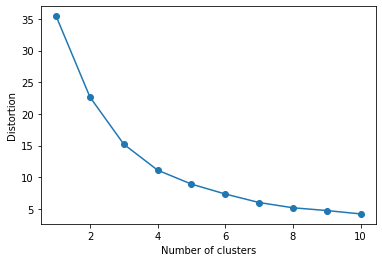

In [66]:
plot_distortion(pca)

In [67]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca)

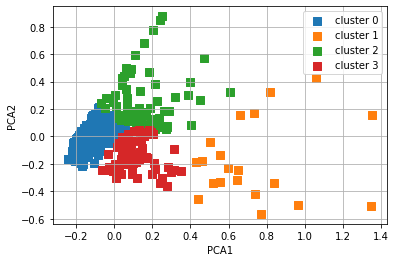

In [68]:
plot_clusters(pca, y_res, 'PCA1', 'PCA2', plt_cluster_centers = False)

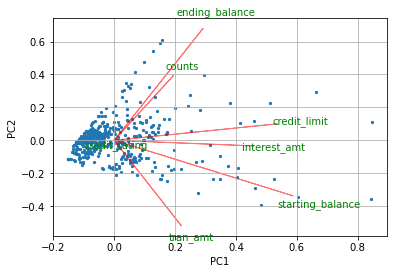

In [69]:
myplot(pca,np.transpose(pcamodel.components_[0:2, :]),list(x.columns))

In [328]:
df8['clusters'] = y_res


In [333]:
df8[df8['clusters'] == 0]

,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,interest_amt,counts,clusters
0,1000,0,657.46,286.69,380.03,9.26,68.0,0
1,3000,0,0.00,1548.23,-1535.59,13.63,32.0,0
4,1000,0,0.00,1000.00,-956.10,44.44,63.0,0
6,2000,10,0.00,0.00,0.00,0.00,38.0,0
8,1300,0,46.42,272.69,-190.06,36.66,36.0,0
...,...,...,...,...,...,...,...,...
461,1300,0,0.00,1300.00,-1287.37,12.63,27.0,0
463,3000,0,1783.86,1785.97,18.55,20.66,75.0,0
464,1500,0,1193.89,1500.00,-188.48,118.98,74.0,0
465,3000,0,0.00,1218.94,-1218.94,0.00,76.0,0


### Question 2 For Real

In [47]:
df_acc = pd.read_csv('twm_accounts.csv', sep=';')
df_acc

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [48]:
df_tran = pd.read_csv('twm_transactions.csv', sep=';')
df_tran

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [49]:
df_cred = pd.read_csv('twm_credit_acct.csv', sep=';')
df_cred

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


find unique key
create new dataframe, go through cust_ids accumulate columns and add to dataframe.

In [50]:
data = df_tran.groupby(by="acct_nbr", dropna=False).agg({'principal_amt': ['mean', 'count', 'sum'], 'interest_amt' : 'sum'})
data = df_acc.join(data, on='acct_nbr')
data

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,-29.654500,40.0,-1186.18,40.54
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,-4.178364,55.0,-229.81,3.75
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,-23.026829,41.0,-944.10,129.69
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,-102.479798,99.0,-10145.50,96.83
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,9.002093,43.0,387.09,11.96
...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00,33.665238,42.0,1413.94,198.70
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00,-15.658163,49.0,-767.25,68.91
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00,-4.976053,38.0,-189.09,380.02
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46,-8.897619,21.0,-186.85,24.78


In [51]:
data = data.iloc[:,6:]
data

,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,1430.22,284.58,-29.654500,40.0,-1186.18,40.54
1,266.34,496.15,-4.178364,55.0,-229.81,3.75
2,55.90,1000.00,-23.026829,41.0,-944.10,129.69
3,11017.13,968.46,-102.479798,99.0,-10145.50,96.83
4,849.37,462.28,9.002093,43.0,387.09,11.96
...,...,...,...,...,...,...
1404,1433.94,20.00,33.665238,42.0,1413.94,198.70
1405,632.75,1400.00,-15.658163,49.0,-767.25,68.91
1406,2810.91,3000.00,-4.976053,38.0,-189.09,380.02
1407,784.53,622.46,-8.897619,21.0,-186.85,24.78


In [52]:
data.fillna(0, inplace=True)

In [53]:
scaler = MinMaxScaler()
x = scaler.fit_transform(data)
x = pd.DataFrame(x, columns=data.columns)
x

,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,0.052829,0.012686,0.035795,0.258065,0.573878,0.039030
1,0.009838,0.022117,0.038625,0.354839,0.607987,0.003610
2,0.002065,0.044578,0.036531,0.264516,0.582512,0.124860
3,0.406951,0.043172,0.027704,0.638710,0.254346,0.093224
4,0.031374,0.020607,0.040089,0.277419,0.629989,0.011515
...,...,...,...,...,...,...
1404,0.052967,0.000892,0.042829,0.270968,0.666611,0.191300
1405,0.023373,0.062409,0.037350,0.316129,0.588820,0.066344
1406,0.103829,0.133733,0.038537,0.245161,0.609439,0.365868
1407,0.028979,0.027748,0.038101,0.135484,0.609519,0.023857


In [54]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(1409, 2)

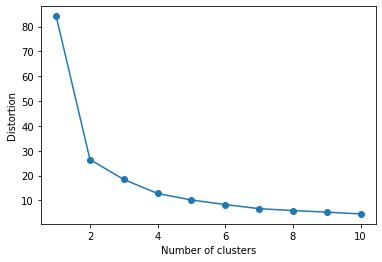

In [55]:
plot_distortion(pca)

In [56]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca)

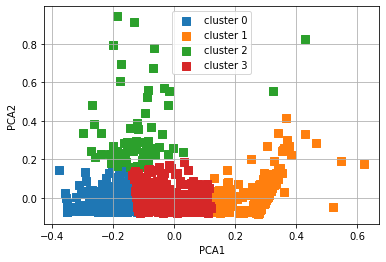

In [57]:
plot_clusters(pca, y_res, 'PCA1', 'PCA2', plt_cluster_centers = False)

### Question 2 FOR REAL FOR REAL

In [26]:
df_cred_acct = pd.read_csv('twm_credit_acct.csv', sep=';')
df_cred_acct

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [27]:
df_cred_tran = pd.read_csv('twm_credit_tran.csv', sep=';')
df_cred_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [28]:
df_savings_acct = pd.read_csv('twm_savings_acct.csv', sep=';')
df_savings_acct

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [29]:
df_savings_tran = pd.read_csv('twm_savings_tran.csv', sep=';')
df_savings_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [30]:
data = df_cred_tran.groupby(by="cust_id", dropna=False).agg({'principal_amt': ['mean', 'count', 'sum'], 'interest_amt' : 'sum'})
data = df_cred_acct.join(data, on='cust_id')
data

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,5.452500,68.0,370.77,9.26
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,-48.382188,32.0,-1548.23,13.63
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,313.480455,22.0,6896.57,80.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,153.476000,15.0,2302.14,104.69
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,-15.873016,63.0,-1000.00,44.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,-0.028133,75.0,-2.11,20.66
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,-4.136622,74.0,-306.11,118.98
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,-16.038684,76.0,-1218.94,0.00
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,-328.571429,28.0,-9200.00,0.00


In [31]:
data = data.drop(columns=['acct_nbr', 'account_active', 'acct_end_date', 'acct_start_date'])

In [32]:
data

,cust_id,credit_limit,credit_rating,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,1363160,1000,0,657.46,286.69,5.452500,68.0,370.77,9.26
1,1362487,3000,0,0.00,1548.23,-48.382188,32.0,-1548.23,13.63
2,1362548,6700,0,6965.25,68.68,313.480455,22.0,6896.57,80.68
3,1362752,2400,0,2302.14,0.00,153.476000,15.0,2302.14,104.69
4,1363017,1000,0,0.00,1000.00,-15.873016,63.0,-1000.00,44.44
...,...,...,...,...,...,...,...,...,...
463,1363364,3000,0,1783.86,1785.97,-0.028133,75.0,-2.11,20.66
464,1363467,1500,0,1193.89,1500.00,-4.136622,74.0,-306.11,118.98
465,1363263,3000,0,0.00,1218.94,-16.038684,76.0,-1218.94,0.00
466,1362569,9200,0,0.00,9200.00,-328.571429,28.0,-9200.00,0.00


In [33]:
data2 = df_savings_tran.groupby(by="cust_id", dropna=False).agg({'principal_amt': ['mean', 'count', 'sum'], 'interest_amt' : 'sum'})
data2 = df_savings_acct.merge(data2, on='cust_id')
data2

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,0.130208,48,6.25,3.25
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-33.972105,19,-645.47,6.63
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,0.000000,12,0.00,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,0.000000,12,0.00,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,35.742917,24,857.83,32.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,11.237097,31,348.35,2.89
416,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,4.957273,33,163.59,11.32
417,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,9.615238,21,201.92,10.78
418,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-2.726071,28,-76.33,2.62


In [34]:
data2 = data2.drop(columns=['acct_nbr', 'acct_type', 'account_active', 'acct_end_date', 'acct_start_date'])

In [35]:
data2

,cust_id,minimum_balance,starting_balance,ending_balance,"(principal_amt, mean)","(principal_amt, count)","(principal_amt, sum)","(interest_amt, sum)"
0,1363160,100,113.04,122.54,0.130208,48,6.25,3.25
1,1362487,500,651.73,12.89,-33.972105,19,-645.47,6.63
2,1362548,100,250.24,254.02,0.000000,12,0.00,3.78
3,1362752,100,600.26,609.33,0.000000,12,0.00,9.07
4,1363017,100,2011.02,2901.35,35.742917,24,857.83,32.50
...,...,...,...,...,...,...,...,...
415,1363141,100,177.33,528.57,11.237097,31,348.35,2.89
416,1363038,100,333.53,508.26,4.957273,33,163.59,11.32
417,1362529,100,662.06,873.14,9.615238,21,201.92,10.78
418,1362895,100,169.96,96.25,-2.726071,28,-76.33,2.62


In [36]:
data3 = data.merge(data2, on='cust_id', how='outer')
data3

,cust_id,credit_limit,credit_rating,starting_balance_x,ending_balance_x,"('principal_amt', 'mean')_x","('principal_amt', 'count')_x","('principal_amt', 'sum')_x","('interest_amt', 'sum')_x",minimum_balance,starting_balance_y,ending_balance_y,"('principal_amt', 'mean')_y","('principal_amt', 'count')_y","('principal_amt', 'sum')_y","('interest_amt', 'sum')_y"
0,1363160,1000.0,0.0,657.46,286.69,5.452500,68.0,370.77,9.26,100.0,113.04,122.54,0.130208,48.0,6.25,3.25
1,1362487,3000.0,0.0,0.00,1548.23,-48.382188,32.0,-1548.23,13.63,500.0,651.73,12.89,-33.972105,19.0,-645.47,6.63
2,1362548,6700.0,0.0,6965.25,68.68,313.480455,22.0,6896.57,80.68,100.0,250.24,254.02,0.000000,12.0,0.00,3.78
3,1362752,2400.0,0.0,2302.14,0.00,153.476000,15.0,2302.14,104.69,100.0,600.26,609.33,0.000000,12.0,0.00,9.07
4,1363017,1000.0,0.0,0.00,1000.00,-15.873016,63.0,-1000.00,44.44,100.0,2011.02,2901.35,35.742917,24.0,857.83,32.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,1363080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,321.16,691.59,17.290476,21.0,363.10,7.33
587,1362550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,638.67,487.77,-6.410385,26.0,-166.67,16.31
588,1362590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,541.95,558.44,0.000000,12.0,0.00,16.49
589,1363141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,177.33,528.57,11.237097,31.0,348.35,2.89


In [37]:
data3.isna().sum()

cust_id                           0
credit_limit                    123
credit_rating                   123
starting_balance_x              123
ending_balance_x                123
('principal_amt', 'mean')_x     134
('principal_amt', 'count')_x    134
('principal_amt', 'sum')_x      134
('interest_amt', 'sum')_x       134
minimum_balance                 171
starting_balance_y              171
ending_balance_y                171
('principal_amt', 'mean')_y     171
('principal_amt', 'count')_y    171
('principal_amt', 'sum')_y      171
('interest_amt', 'sum')_y       171
dtype: int64

In [38]:
data3.fillna(0, inplace=True)

In [39]:
data3.drop(columns=['cust_id'])

,credit_limit,credit_rating,starting_balance_x,ending_balance_x,"('principal_amt', 'mean')_x","('principal_amt', 'count')_x","('principal_amt', 'sum')_x","('interest_amt', 'sum')_x",minimum_balance,starting_balance_y,ending_balance_y,"('principal_amt', 'mean')_y","('principal_amt', 'count')_y","('principal_amt', 'sum')_y","('interest_amt', 'sum')_y"
0,1000.0,0.0,657.46,286.69,5.452500,68.0,370.77,9.26,100.0,113.04,122.54,0.130208,48.0,6.25,3.25
1,3000.0,0.0,0.00,1548.23,-48.382188,32.0,-1548.23,13.63,500.0,651.73,12.89,-33.972105,19.0,-645.47,6.63
2,6700.0,0.0,6965.25,68.68,313.480455,22.0,6896.57,80.68,100.0,250.24,254.02,0.000000,12.0,0.00,3.78
3,2400.0,0.0,2302.14,0.00,153.476000,15.0,2302.14,104.69,100.0,600.26,609.33,0.000000,12.0,0.00,9.07
4,1000.0,0.0,0.00,1000.00,-15.873016,63.0,-1000.00,44.44,100.0,2011.02,2901.35,35.742917,24.0,857.83,32.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.00,100.0,321.16,691.59,17.290476,21.0,363.10,7.33
587,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.00,500.0,638.67,487.77,-6.410385,26.0,-166.67,16.31
588,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.00,500.0,541.95,558.44,0.000000,12.0,0.00,16.49
589,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.00,100.0,177.33,528.57,11.237097,31.0,348.35,2.89


In [40]:
scaler = MinMaxScaler()
x = scaler.fit_transform(data3)
x = pd.DataFrame(x, columns=data3.columns)
x

,cust_id,credit_limit,credit_rating,starting_balance_x,ending_balance_x,"('principal_amt', 'mean')_x","('principal_amt', 'count')_x","('principal_amt', 'sum')_x","('interest_amt', 'sum')_x",minimum_balance,starting_balance_y,ending_balance_y,"('principal_amt', 'mean')_y","('principal_amt', 'count')_y","('principal_amt', 'sum')_y","('interest_amt', 'sum')_y"
0,0.669951,0.057803,0.0,0.057699,0.030178,0.039695,0.438710,0.515890,0.008915,0.2,0.006533,0.005463,0.327460,0.774194,0.200674,0.006493
1,0.006897,0.173410,0.0,0.000000,0.162972,0.033714,0.206452,0.415594,0.013122,1.0,0.037665,0.000575,0.210168,0.306452,0.152239,0.013245
2,0.066995,0.387283,0.0,0.611273,0.007229,0.073916,0.141935,0.856957,0.077676,0.2,0.014462,0.011324,0.327013,0.193548,0.200209,0.007551
3,0.267980,0.138728,0.0,0.202037,0.000000,0.056140,0.096774,0.616832,0.100791,0.2,0.034690,0.027162,0.327013,0.193548,0.200209,0.018119
4,0.529064,0.057803,0.0,0.000000,0.105263,0.037326,0.406452,0.444247,0.042785,0.2,0.116221,0.129335,0.449948,0.387097,0.263961,0.064926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.591133,0.000000,0.0,0.000000,0.000000,0.039089,0.000000,0.496512,0.000000,0.2,0.018560,0.030829,0.386482,0.338710,0.227194,0.014643
587,0.068966,0.000000,0.0,0.000000,0.000000,0.039089,0.000000,0.496512,0.000000,1.0,0.036910,0.021744,0.304965,0.419355,0.187823,0.032583
588,0.108374,0.000000,0.0,0.000000,0.000000,0.039089,0.000000,0.496512,0.000000,1.0,0.031320,0.024894,0.327013,0.193548,0.200209,0.032942
589,0.651232,0.000000,0.0,0.000000,0.000000,0.039089,0.000000,0.496512,0.000000,0.2,0.010248,0.023562,0.365662,0.500000,0.226098,0.005773


In [41]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(591, 2)

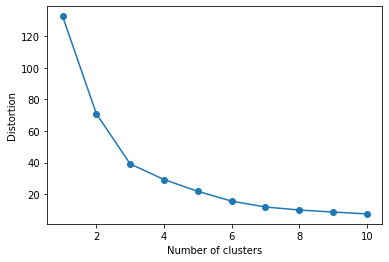

In [42]:
plot_distortion(pca)

In [45]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca)

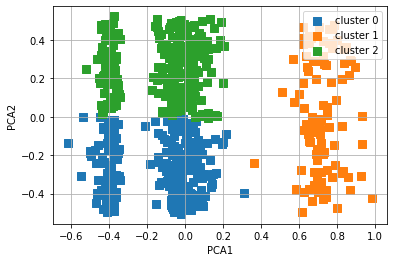

In [46]:
plot_clusters(pca, y_res, 'PCA1', 'PCA2', plt_cluster_centers = False)

### LAST TRY, MERGE ONTO CUSTOMER!!!!!!

In [78]:
df_cust = pd.read_csv('twm_customer.csv', sep=';')
df_savings_acct = pd.read_csv('twm_savings_acct.csv', sep=';')
df_cred_acct = pd.read_csv('twm_credit_acct.csv', sep=';')
trans_df = pd.read_csv('twm_transactions.csv', sep=';')
df_accounts = pd.read_csv('twm_accounts.csv', sep=';')

In [79]:
trans_df = trans_df.merge(df_accounts[['acct_nbr','cust_id']], 
                                        left_on = 'acct_nbr',
                                        right_on = 'acct_nbr',
                                        how = 'inner')

In [80]:
trans_df_grouped = trans_df.groupby('cust_id').agg(avg_trans_amount = ('tran_amt', 'mean'),
                                                          total_trans_amount = ('tran_amt','sum'),
                                                          count_trans = ('tran_amt', 'count'))\
                                                      .reset_index()

In [8]:
df_savings_acct['savings'] = df_savings_acct['ending_balance'] - df_savings_acct['starting_balance']
df_cred_acct['credit'] = df_cred_acct['ending_balance'] - df_cred_acct['starting_balance']

In [9]:
# merge
df_bnk_behav = df_bnk_behav.merge(df_trans_grouped, 
                                  left_on='cust_id', 
                                  right_on = 'cust_id',
                                  how='inner')
data = df_cust.merge(df_savings_acct[['cust_id', 'account_active','savings']].rename(columns={'account_active':'savings_account'}),
                                 left_on = 'cust_id',
                                 right_on = 'cust_id',
                                 how = 'left')
data = data.merge(df_cred_acct[['cust_id', 'account_active','credit', 'credit_limit']].rename(columns={'account_active':'credit_account'}),
                                 left_on = 'cust_id',
                                 right_on = 'cust_id',
                                 how = 'left')

In [10]:
data['credit_limit'].fillna(0, inplace=True)
data['credit'].fillna(0, inplace=True)
data['savings'].fillna(0, inplace=True)

In [11]:
# map values
data['credit_account'] = data['credit_account'].str.strip().replace({np.nan: 'dont_have',
                                                                            'Y': 'active',
                                                                            'N': 'inactive'})
# map values
data['savings_account'] = data['savings_account'].str.strip().replace({np.nan: 'dont_have',
                                                                            'Y': 'active',
                                                                            'N': 'inactive'})

In [12]:
columns = ['savings_account', 'savings', 'credit_account', 'credit',
               'credit_limit']
data = data[columns]

In [13]:
data = pd.get_dummies(data, drop_first=True)

In [14]:
scaler = MinMaxScaler()
x = scaler.fit_transform(data)
x = pd.DataFrame(x, columns=data.columns)
x

,savings,credit,credit_limit,savings_account_dont_have,savings_account_inactive,credit_account_dont_have,credit_account_inactive
0,0.178426,0.503488,0.000000,1.0,0.0,1.0,0.0
1,0.131055,0.584406,0.173410,0.0,1.0,0.0,0.0
2,0.179130,0.484110,0.057803,0.0,0.0,0.0,0.0
3,0.179098,0.383168,0.138728,0.0,0.0,0.0,1.0
4,0.178706,0.143043,0.387283,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
742,0.178426,0.503488,0.000000,1.0,0.0,1.0,0.0
743,0.172960,0.571432,0.075145,0.0,0.0,0.0,0.0
744,0.178426,0.984321,0.531792,1.0,0.0,0.0,0.0
745,0.178426,0.503599,0.173410,1.0,0.0,0.0,1.0


In [15]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(747, 2)

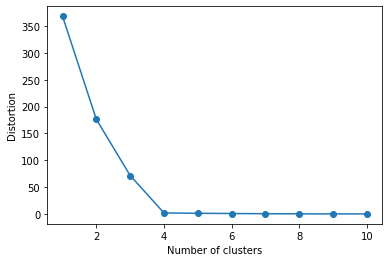

In [16]:
plot_distortion(pca)

In [19]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
y_res = km.fit_predict(pca)

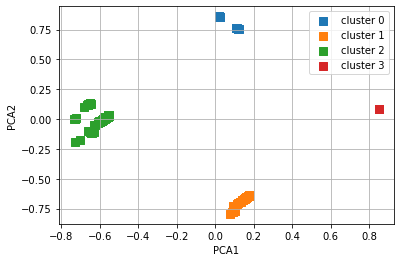

In [20]:
plot_clusters(pca, y_res, 'PCA1', 'PCA2', plt_cluster_centers = False)

In [21]:
data['cluster'] = y_res

In [25]:
data[data['cluster']==3]['credit'].sum()

0.0